# Exploratory Data Analysis

This is the third step in the Data Science Method. We introduced this topic in the last subunit. With Data Wrangling out of the way we can progress to the Exploratory Data Analysis section. In this exercise, you will learn to build data profiles and plots, including relationship plot and data correlation plot. You will also implement k-means clustering, complete clusters, and update data frame as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

#### Import the neccessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/HOME/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
/Users/HOME/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Read the cleaned data

In [2]:
crime_data = pd.read_csv("/Users/HOME/Desktop/LosAngelesCrime/data/datawrangling.csv",index_col = 0)
crime_data.head()

/Users/HOME/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_cd,crm_cd_desc,mocodes,...,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,location,lat,lon,day_crime_occ,no_rptd_occ
0,1307355,2010-02-20,2010-02-20,13:50,13,Newton,1385,900,VIOLATION OF COURT ORDER,0913 1814 2000,...,SINGLE FAMILY DWELLING,500.0,UNKNOWN WEAPON/OTHER WEAPON,AA,Adult Arrest,300 E GAGE AV,33.9825,-118.2695,Saturday,0 days 00:00:00.000000000
1,11401303,2010-09-13,2010-09-12,00:45,14,Pacific,1485,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,SEPULVEDA BL,33.9599,-118.3962,Sunday,1 days 00:00:00.000000000
2,70309629,2010-08-09,2010-08-09,15:15,13,Newton,1324,946,OTHER MISCELLANEOUS CRIME,0344,...,ALLEY,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1300 E 21ST ST,34.0224,-118.2524,Monday,0 days 00:00:00.000000000
3,90631215,2010-01-05,2010-01-05,01:50,6,Hollywood,646,900,VIOLATION OF COURT ORDER,1100 0400 1402,...,STREET,102.0,HAND GUN,IC,Invest Cont,CAHUENGA BL,34.1016,-118.3295,Tuesday,0 days 00:00:00.000000000
4,100100501,2010-01-03,2010-01-02,21:00,1,Central,176,122,"RAPE, ATTEMPTED",0400,...,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,8TH ST,34.0387,-118.2488,Saturday,1 days 00:00:00.000000000


In [3]:
crime_data.shape

(2114451, 24)

In [35]:
crime_data.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'crm_cd', 'crm_cd_desc', 'mocodes', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'location',
       'lat', 'lon', 'day_crime_occ', 'no_rptd_occ'],
      dtype='object')

# Build data profile tables and plots 

In [5]:
#Summary statistics
crime_data.describe()

,dr_no,area,rpt_dist_no,crm_cd,vict_age,premis_cd,weapon_used_cd,lat,lon
count,2.114451e+06,2.114451e+06,2.114451e+06,2.114451e+06,2.114451e+06,2.114451e+06,2.114451e+06,2.114451e+06,2.114451e+06
mean,1.479076e+08,1.108697e+01,1.155084e+03,5.072936e+02,3.177457e+01,3.111279e+02,4.567898e+02,3.406379e+01,-1.183089e+02
std,2.886062e+07,6.012498e+00,6.012650e+02,2.106056e+02,2.064230e+01,2.112968e+02,8.953787e+01,7.108851e-01,2.438241e+00
min,1.208575e+06,1.000000e+00,1.000000e+02,1.100000e+02,0.000000e+00,1.010000e+02,1.010000e+02,0.000000e+00,-1.188279e+02
25%,1.214233e+08,6.000000e+00,6.430000e+02,3.300000e+02,2.000000e+01,1.020000e+02,4.000000e+02,3.401050e+01,-1.184364e+02
50%,1.508082e+08,1.100000e+01,1.189000e+03,4.420000e+02,3.200000e+01,2.100000e+02,5.000000e+02,3.406230e+01,-1.183295e+02
75%,1.715113e+08,1.600000e+01,1.668000e+03,6.260000e+02,4.600000e+01,5.010000e+02,5.000000e+02,3.417580e+01,-1.182778e+02
max,2.021122e+08,2.100000e+01,2.199000e+03,9.560000e+02,1.180000e+02,9.710000e+02,5.160000e+02,3.479070e+01,0.000000e+00


In [6]:
crime_data.columns


Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'crm_cd', 'crm_cd_desc', 'mocodes', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'location',
       'lat', 'lon', 'day_crime_occ', 'no_rptd_occ'],
      dtype='object')

In [7]:
crime_data.crm_cd_desc.value_counts()

BATTERY - SIMPLE ASSAULT                                   190545
BURGLARY FROM VEHICLE                                      162158
VEHICLE - STOLEN                                           159850
THEFT PLAIN - PETTY ($950 & UNDER)                         149812
BURGLARY                                                   147625
                                                            ...  
BLOCKING DOOR INDUCTION CENTER                                  3
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        2
TRAIN WRECKING                                                  2
FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)         1
DRUNK ROLL - ATTEMPT                                            1
Name: crm_cd_desc, Length: 142, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8315a51490>,
      dtype=object)

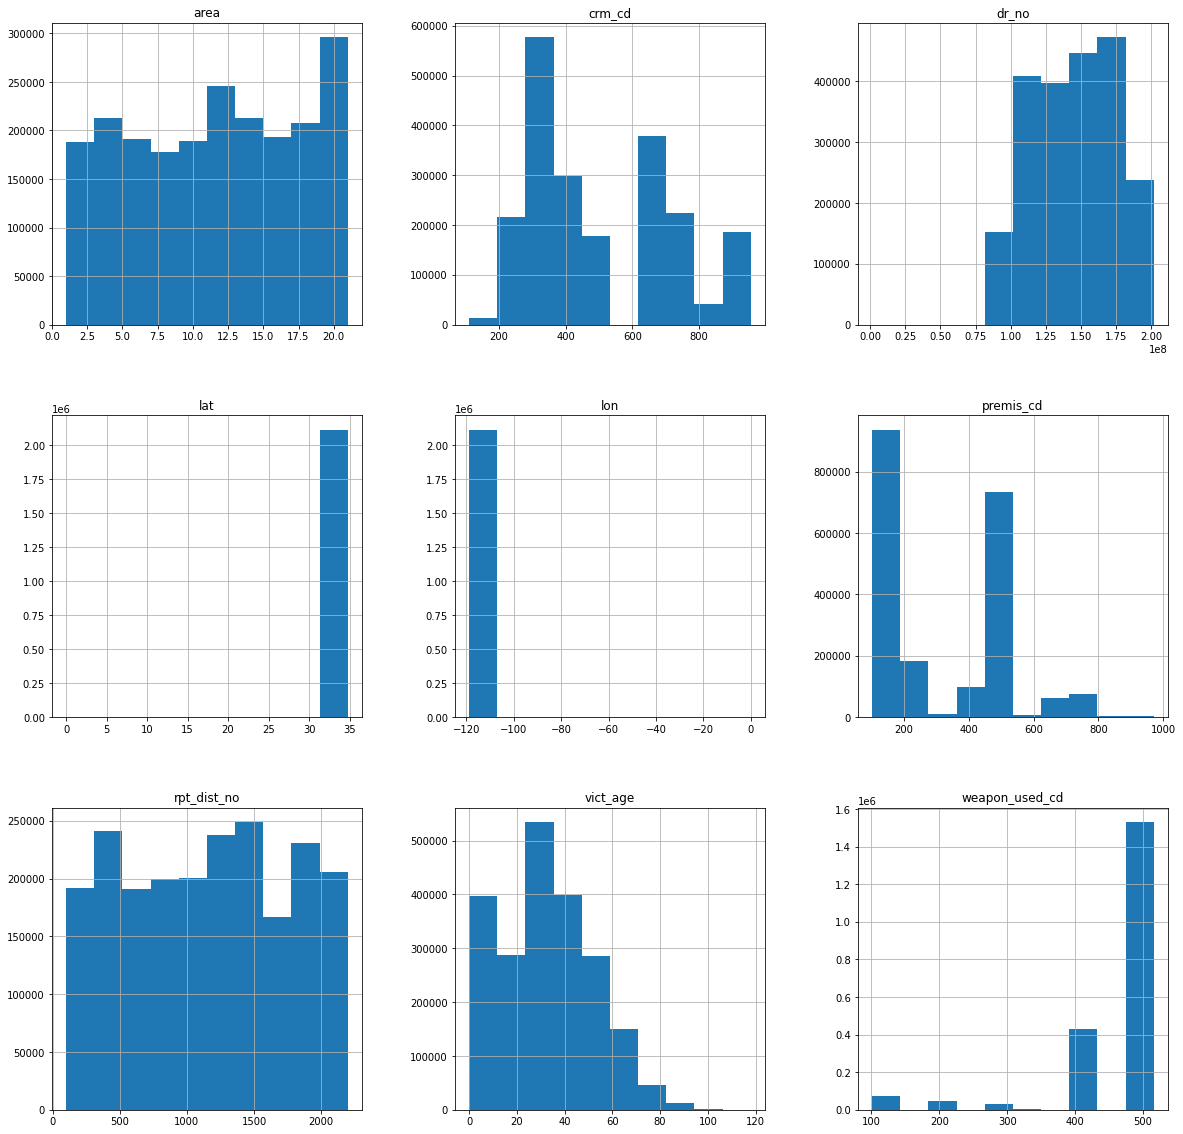

In [8]:
#Histograms for all numeric features
crime_data.hist(figsize=(20,20))

In [9]:
crime_data.area_name.value_counts()

77th Street    145226
Southwest      135342
N Hollywood    113881
Pacific        112475
Southeast      111436
Mission        103541
Northeast      100210
Newton          99959
Van Nuys        99663
Hollywood       98951
Central         98238
Topanga         97569
Devonshire      96418
Olympic         95251
Harbor          91976
Rampart         89575
West Valley     89496
West LA         88986
Wilshire        88555
Foothill        79816
Hollenbeck      77887
Name: area_name, dtype: int64

Text(0.5, 1.0, 'Crimes in LA From 2010-2019')

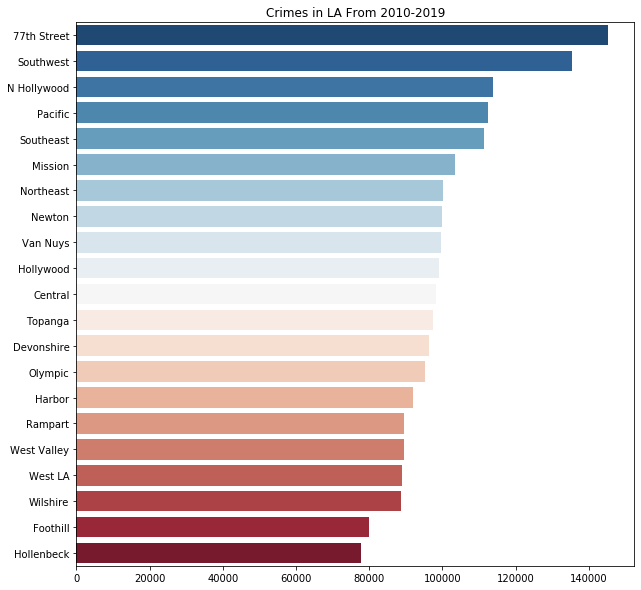

In [5]:
f, ax = plt.subplots(figsize=(10, 10))
Area = pd.DataFrame(crime_data.area_name.value_counts())
name = list(Area.index)
values = list(Area.area_name)
sns.barplot(y = name,x = values,palette="RdBu_r")
ax.set_title("Crimes in LA From 2010-2019")

#### As we can see the 5 most crime occuring area 77th Street,Southwest,N Hollywood,Pacific,Southeast AND the 5  least crime occuring areas are Hollenbeck,Foothill,Wilshire,West LA,West Valley.

In [12]:
#Now we will see trend of crimes in LA neighborhood year by year
def plotyear(crimeyear):
    year = pd.to_datetime(crime_data['date_occ']).dt.year
    data = crime_data[year == crimeyear]
    return data

In [13]:
plotyear(2010).area_name.value_counts().head()

77th Street    14430
Southwest      13642
N Hollywood    11347
Pacific        11077
Southeast      11062
Name: area_name, dtype: int64

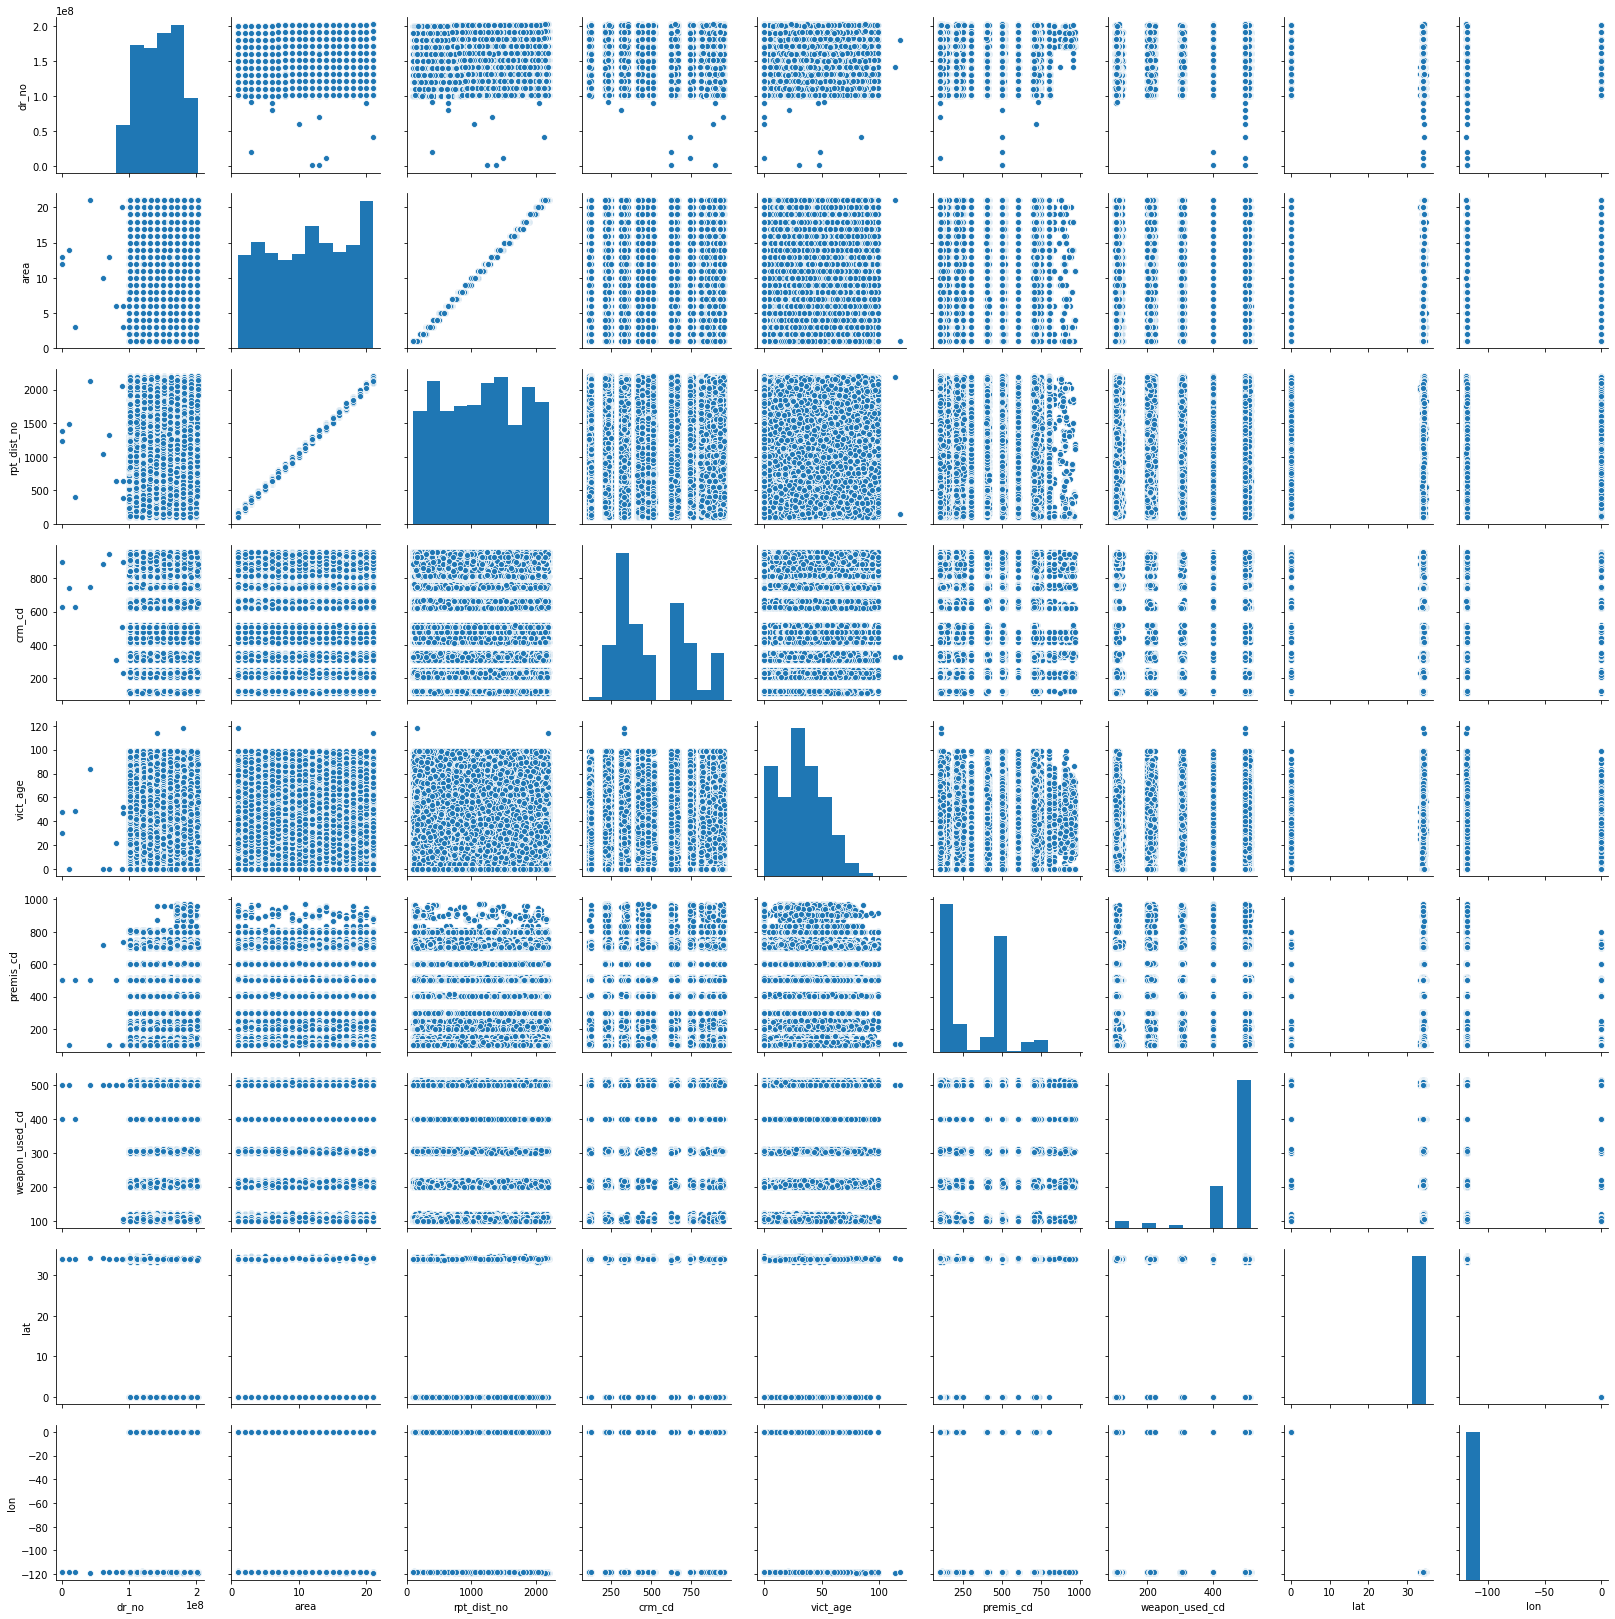

In [45]:
#pairplots
sns.pairplot(crime_data)

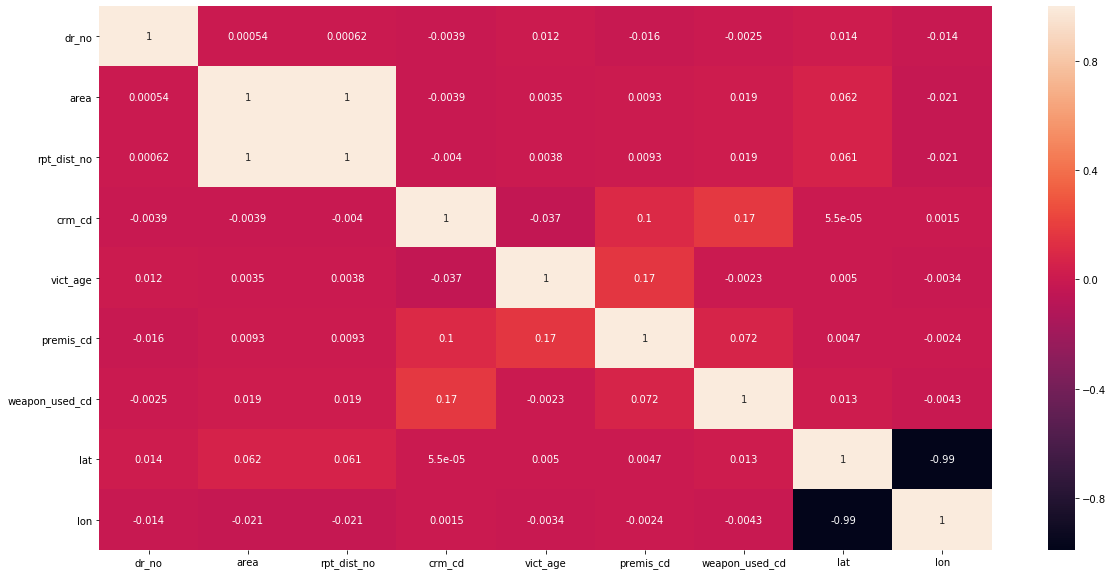

In [6]:
#Heatmap
plt.figure(figsize = (20,10))
sns.heatmap(crime_data.corr(),annot = True)

In [138]:
import geopandas

In [139]:
df1 = geopandas.read_file("/Users/HOME/Desktop/LosAngelesCrime/LAPD_Reporting_Districts.shp")

In [1122]:
merged2.loc['MISSION']['coords'][0]

(-118.48616387024481, 34.32621870456819)

In [1152]:



def plot_crime_density1(crimeyear):
    year = pd.to_datetime(crime_data['date_occ']).dt.year
    data = pd.DataFrame(crime_data[year == crimeyear].area_name.value_counts())
    data.index = map(lambda x: str(x).upper(), data.index)
    merged2 = df1.set_index('APREC').join(data)
    fig, ax = plt.subplots(figsize = (35,20))

    xlim = ([merged2.total_bounds[0],  merged2.total_bounds[2]])
    ylim = ([merged2.total_bounds[1],  merged2.total_bounds[3]])

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    merged2.plot(column = 'area_name',ax = ax,legend = True,cmap="YlOrRd")
    for idx, row in merged2.iterrows():
        plt.annotate(s = idx,xy =merged2.loc[idx]['coords'][0],horizontalalignment='center')

    ax.set(title='LOSANGELES')
    ax.set_axis_off()

    plt.show()
    print("The highest 5 crime areas:", data.head())
    print("The lowest 5 crime area:", data.tail())





In [1153]:
from ipywidgets import interact,widgets
interact(plot_crime_density1,crimeyear = widgets.IntSlider(min = 2010,max = 2019,step=1,value=2015))

interactive(children=(IntSlider(value=2015, description='crimeyear', max=2019, min=2010), Output()), _dom_clas…

<function __main__.plot_crime_density1(crimeyear)>

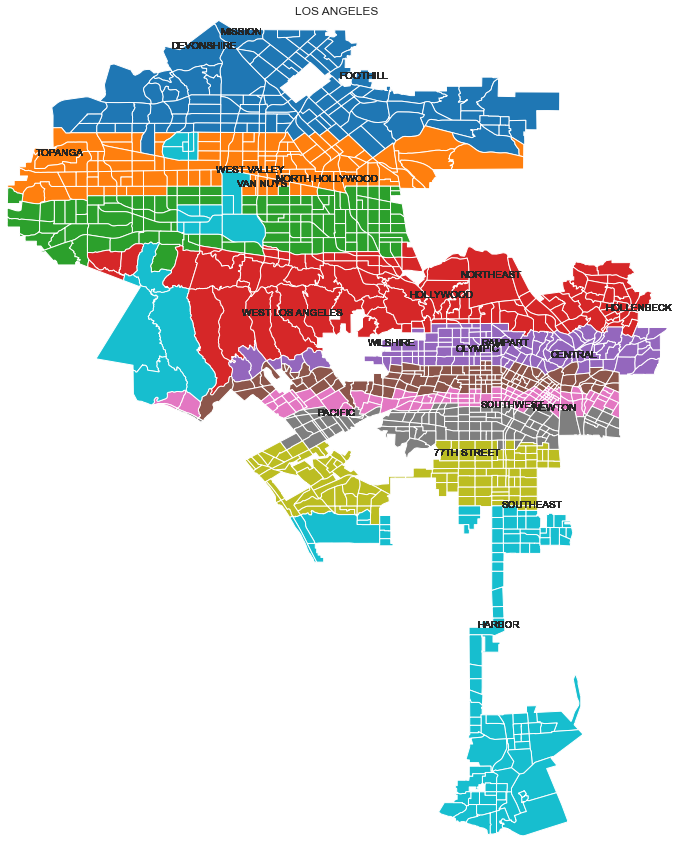

In [1167]:

df2 = df1.set_index('APREC')

fig, ax = plt.subplots(figsize = (30,15))

xlim = ([df2.total_bounds[0],  df2.total_bounds[2]])
ylim = ([df2.total_bounds[1],  df2.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

df2.plot(alpha = 1, ax = ax,legend = True,cmap = 'tab10')
for idx, row in df2.iterrows():
    plt.annotate(s = idx,xy =df2.loc[idx]['coords'][0],horizontalalignment='center')



ax.set(title='LOS ANGELES')
ax.set_axis_off()

plt.show()

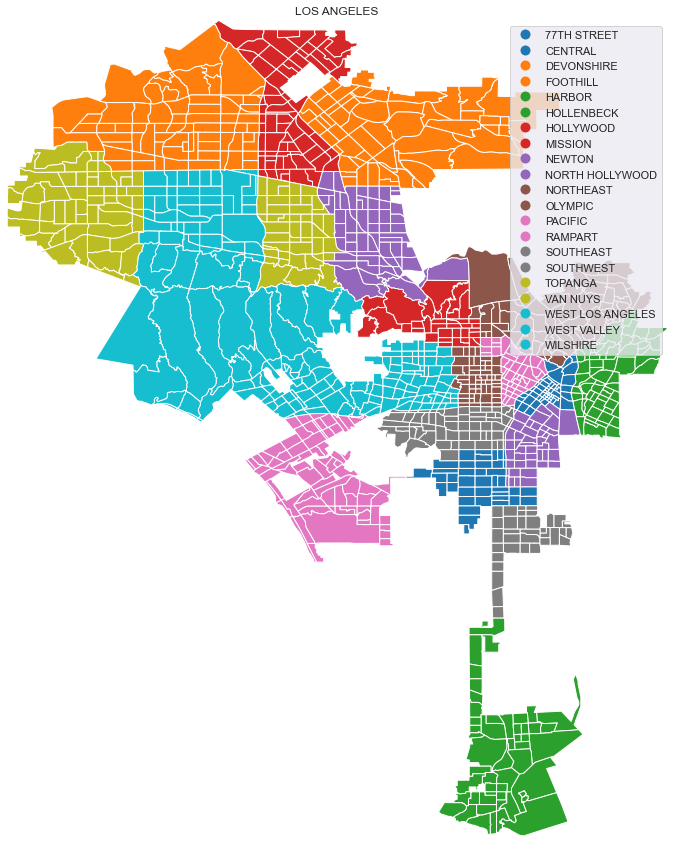

In [1023]:
#df1.total_bounds

# Plot the data with a modified spatial extent
fig, ax = plt.subplots(figsize = (30,15))

xlim = ([df1.total_bounds[0],  df1.total_bounds[2]])
ylim = ([df1.total_bounds[1],  df1.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

df1.plot(column = 'APREC',alpha = 1, ax = ax,legend = True)


ax.set(title='LOS ANGELES')
ax.set_axis_off()

plt.show()

In [1098]:
merged2

,OBJECTID,REPDIST,PREC,BUREAU,BASICCAR,TOOLTIP,geometry,coords,area_name
77TH STREET,932,1203,12,SOUTH BUREAU,12A3,Bureau: SOUTH BUREAU\nDistrict: 1203\nDivision...,"POLYGON ((-118.31712 34.00371, -118.31658 34.0...","(-118.31084144822984, 33.99939663060419)",14630.0
77TH STREET,933,1209,12,SOUTH BUREAU,12A15,Bureau: SOUTH BUREAU\nDistrict: 1209\nDivision...,"POLYGON ((-118.28271 34.00377, -118.28158 34.0...","(-118.28177676683674, 33.99984604318588)",14630.0
77TH STREET,934,1204,12,SOUTH BUREAU,12A3,Bureau: SOUTH BUREAU\nDistrict: 1204\nDivision...,"POLYGON ((-118.30455 34.00373, -118.30401 34.0...","(-118.2980483418257, 34.0017868634083)",14630.0
77TH STREET,935,1208,12,SOUTH BUREAU,12A15,Bureau: SOUTH BUREAU\nDistrict: 1208\nDivision...,"POLYGON ((-118.28715 34.00373, -118.28445 34.0...","(-118.28490879007755, 33.99984604311109)",14630.0
77TH STREET,936,1207,12,SOUTH BUREAU,12A15,Bureau: SOUTH BUREAU\nDistrict: 1207\nDivision...,"POLYGON ((-118.29156 34.00371, -118.29096 34.0...","(-118.28932467741254, 33.999506221584255)",14630.0
...,...,...,...,...,...,...,...,...,...
WILSHIRE,784,784,7,WEST BUREAU,7A73,Bureau: WEST BUREAU\nDistrict: 784\nDivision: ...,"POLYGON ((-118.35282 34.04122, -118.35173 34.0...","(-118.3503256302365, 34.037624170440836)",8344.0
WILSHIRE,790,785,7,WEST BUREAU,7A85,Bureau: WEST BUREAU\nDistrict: 785\nDivision: ...,"POLYGON ((-118.34239 34.03985, -118.34142 34.0...","(-118.34237700480796, 34.0368412263272)",8344.0
WILSHIRE,795,789,7,WEST BUREAU,7A69,Bureau: WEST BUREAU\nDistrict: 789\nDivision: ...,"POLYGON ((-118.32365 34.03991, -118.32247 34.0...","(-118.322704204769, 34.03779237953236)",8344.0
WILSHIRE,796,787,7,WEST BUREAU,7A85,Bureau: WEST BUREAU\nDistrict: 787\nDivision: ...,"POLYGON ((-118.33658 34.03987, -118.33632 34.0...","(-118.33510972023157, 34.037225186758306)",8344.0


In [846]:
def plot_crime_density(crimeyear):
    year = pd.to_datetime(crime_data['date_occ']).dt.year
    data = pd.DataFrame(crime_data[year == crimeyear].area_name.value_counts())
    data.index = map(lambda x: str(x).upper(), data.index)
    merged = df1.set_index('APREC').join(data)
    fig, ax = plt.subplots(figsize = (15,8))

    xlim = ([merged.total_bounds[0],  merged.total_bounds[2]])
    ylim = ([merged.total_bounds[1],  merged.total_bounds[3]])

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    merged.plot(column = 'area_name',ax = ax,legend = True,cmap="YlOrRd")

    ax.set(title='LOSANGELES')
    ax.set_axis_off()

    plt.show()
    print("The highest 5 crime areas:", data.head())
    print("The lowest 5 crime area:", data.tail())

In [1022]:
from ipywidgets import interact,widgets
interact(plot_crime_density,crimeyear = widgets.IntSlider(min = 2010,max = 2019,step=1,value=2015))

interactive(children=(IntSlider(value=2015, description='crimeyear', max=2019, min=2010), Output()), _dom_clas…

<function __main__.plot_crime_density(crimeyear)>

### Now we will see the crime trends over the year

In [1005]:
df['month_year'] = pd.to_datetime(crime_data['date_occ']).dt.to_period('M')

In [1006]:
df

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_cd,crm_cd_desc,mocodes,...,weapon_desc,status,status_desc,location,lat,lon,day_crime_occ,no_rptd_occ,geometry,month_year
0,1307355,2010-02-20,2010-02-20,13:50,13,Newton,1385,900,VIOLATION OF COURT ORDER,0913 1814 2000,...,UNKNOWN WEAPON/OTHER WEAPON,AA,Adult Arrest,300 E GAGE AV,33.9825,-118.2695,Saturday,0 days 00:00:00.000000000,POINT (-118.26950 33.98250),2010-02
1,11401303,2010-09-13,2010-09-12,00:45,14,Pacific,1485,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,SEPULVEDA BL,33.9599,-118.3962,Sunday,1 days 00:00:00.000000000,POINT (-118.39620 33.95990),2010-09
2,70309629,2010-08-09,2010-08-09,15:15,13,Newton,1324,946,OTHER MISCELLANEOUS CRIME,0344,...,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1300 E 21ST ST,34.0224,-118.2524,Monday,0 days 00:00:00.000000000,POINT (-118.25240 34.02240),2010-08
3,90631215,2010-01-05,2010-01-05,01:50,6,Hollywood,646,900,VIOLATION OF COURT ORDER,1100 0400 1402,...,HAND GUN,IC,Invest Cont,CAHUENGA BL,34.1016,-118.3295,Tuesday,0 days 00:00:00.000000000,POINT (-118.32950 34.10160),2010-01
4,100100501,2010-01-03,2010-01-02,21:00,1,Central,176,122,"RAPE, ATTEMPTED",0400,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,8TH ST,34.0387,-118.2488,Saturday,1 days 00:00:00.000000000,POINT (-118.24880 34.03870),2010-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115050,190506304,2019-02-22,2019-02-22,08:40,5,Harbor,569,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,0443 0419 0416 1259,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,100 W 22ND ST,33.7257,-118.2801,Friday,0 days 00:00:00.000000000,POINT (-118.28010 33.72570),2019-02
2115051,190715222,2019-08-15,2019-08-14,18:10,7,Wilshire,701,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),1300 0344,...,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,WILLOUGHBY AV,34.0871,-118.3732,Wednesday,1 days 00:00:00.000000000,POINT (-118.37320 34.08710),2019-08
2115052,192004409,2019-01-06,2019-01-06,21:00,20,Olympic,2029,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0432 0421 0340 0305 0444 0429 0537 1218 0216,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,6TH,34.0637,-118.2870,Sunday,0 days 00:00:00.000000000,POINT (-118.28700 34.06370),2019-01
2115053,191716777,2019-10-17,2019-10-16,18:00,17,Devonshire,1795,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0344,...,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,17200 NAPA ST,34.2266,-118.5085,Wednesday,1 days 00:00:00.000000000,POINT (-118.50850 34.22660),2019-10


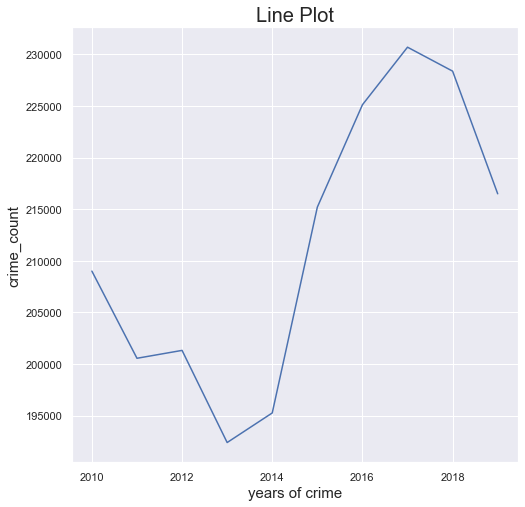

In [7]:
plt.figure(figsize = (8,8))
sns.set(style="darkgrid")
year = pd.to_datetime(crime_data['date_occ']).dt.year
trend = crime_data.groupby(year).count()
ax = sns.lineplot(x = trend.index,y=trend.date_occ,data = trend,
                  palette = "hot", dashes = True,markers = "o" )
 
plt.title("Line Plot", fontsize = 20)
plt.xlabel("years of crime", fontsize = 15)
plt.ylabel("crime_count", fontsize = 15)
plt.show()


#### it shows that 2017 has the highest crimes from 2010-2019.

### MONTH OF CRIME

In [456]:
month = crime_data.groupby(pd.to_datetime(crime_data['date_occ']).dt.month_name().str.slice(stop=3)).count()
month = month.sort_values(by='area',ascending=False)

Text(0.5, 1.0, 'Crimes in LA From 2010-2019')

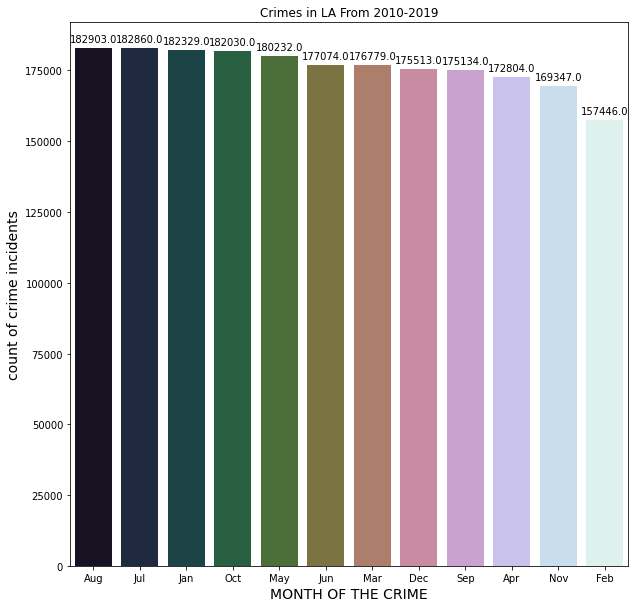

In [630]:
f, ax = plt.subplots(figsize=(10, 10))
crime_month = list(month.index)
crime_count = list(month.date_occ)
splot = sns.barplot(x = crime_month,y = crime_count,data = month,palette="cubehelix")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("MONTH OF THE CRIME", size=14)
plt.ylabel("count of crime incidents", size=14)
plt.savefig("add_text_to_top_of_bars_in_barplot_Seaborn_Python.png")
ax.set_title("Crimes in LA From 2010-2019")





#### As we can see clearly AUGUST has the highest crimes. And  Nov, Feb were having the lowest crimes.

### DAY OF CRIME

Text(0.5, 1.0, 'Crimes in LA From 2010-2019')

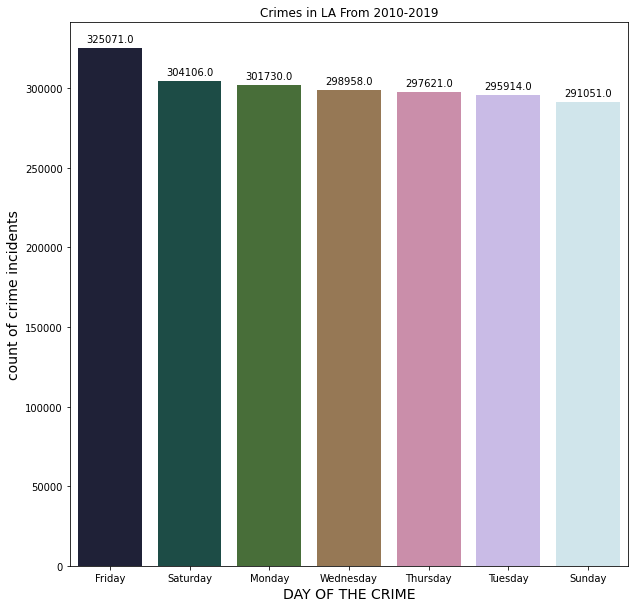

In [601]:
f, ax = plt.subplots(figsize=(10, 10))
day = crime_data.groupby('day_crime_occ').count()
day = day[['date_occ']].sort_values('date_occ',ascending = False)
crime_day = list(day.index)
crime_count = list(day.date_occ)
splot = sns.barplot(x = crime_day,y = crime_count,data = day,palette="cubehelix")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("DAY OF THE CRIME", size=14)
plt.ylabel("count of crime incidents", size=14)
plt.savefig("add_text_to_top_of_bars_in_barplot_Seaborn_Python.png")
ax.set_title("Crimes in LA From 2010-2019")


#### Friday and Sunday have the most crimes and least crimes respectively

### SEX OF THE VICTIMS

Text(0.5, 1.0, 'Crimes in LA From 2010-2019')

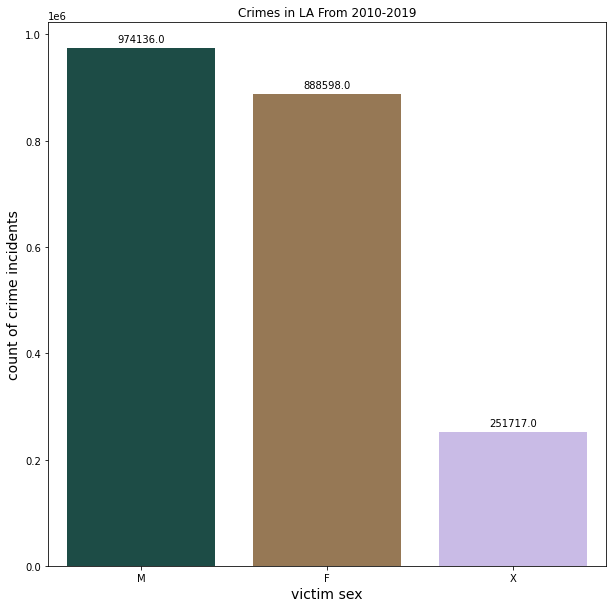

In [592]:
f, ax = plt.subplots(figsize=(10, 10))
sex = crime_data.groupby('vict_sex').count().sort_values('date_occ',ascending = False)
vict_sex = list(sex.index)
crime_count = list(sex.date_occ)
splot = sns.barplot(x = vict_sex,y = crime_count,data = day,palette="cubehelix")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("victim sex", size=14)
plt.ylabel("count of crime incidents", size=14)
plt.savefig("add_text_to_top_of_bars_in_barplot_Seaborn_Python.png")
ax.set_title("Crimes in LA From 2010-2019")

#### It is evident that more of the victims are Males.

### AGE AND SEX OF THE VICTIM

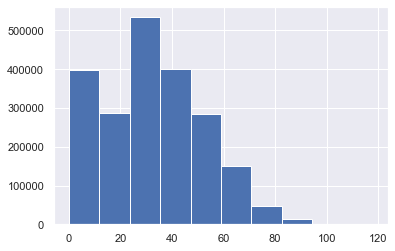

In [783]:
crime_data.vict_age.hist(bins = 10)

#### It is evident that most victims are of age between 25-30.

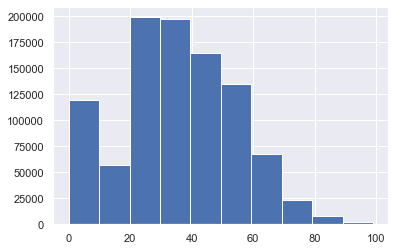

In [781]:
male = crime_data[crime_data['vict_sex'] == 'M']
male.vict_age.hist(bins=10)

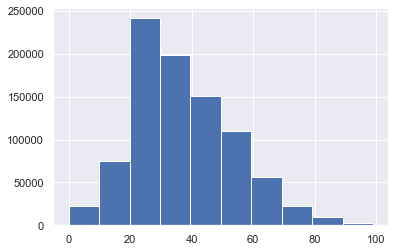

In [784]:
female = crime_data[crime_data['vict_sex'] == 'F']
female.vict_age.hist(bins =10)

#### most male and female victims are of age between 20-40.But It is evident that female are more victimized than male in the age group of 20-40.

### TYPES OF CRIME

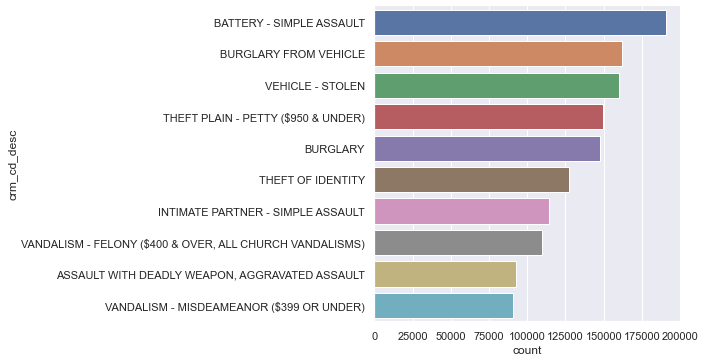

In [789]:
sns.catplot(y = 'crm_cd_desc',kind = 'count',
            data = crime_data,order = crime_data['crm_cd_desc'].value_counts().iloc[:10].index)

#### We can see the top 10 crime types above."BATTERY - SIMPLE ASSAULT" is the top 1 crime type.

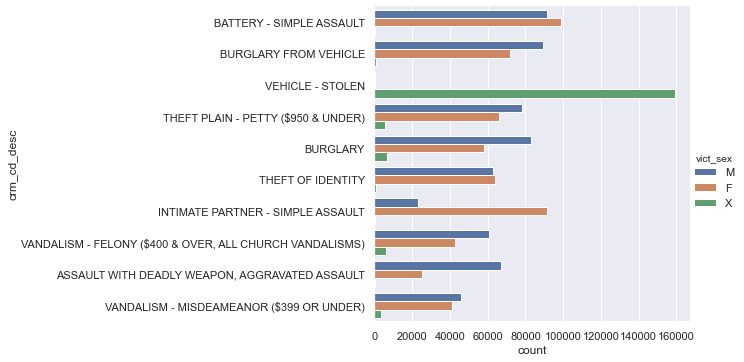

In [790]:
sns.catplot(y = 'crm_cd_desc',kind = 'count',
            data = crime_data,hue = 'vict_sex',order = crime_data['crm_cd_desc'].value_counts().iloc[:10].index)

#### Above plot shows that females are more victims of "BATTERY - SIMPLE ASSAULT" and "INTIMATE PARTNER - SIMPLE ASSAULT" than males.


### Crime types for persons of age 70 or above.

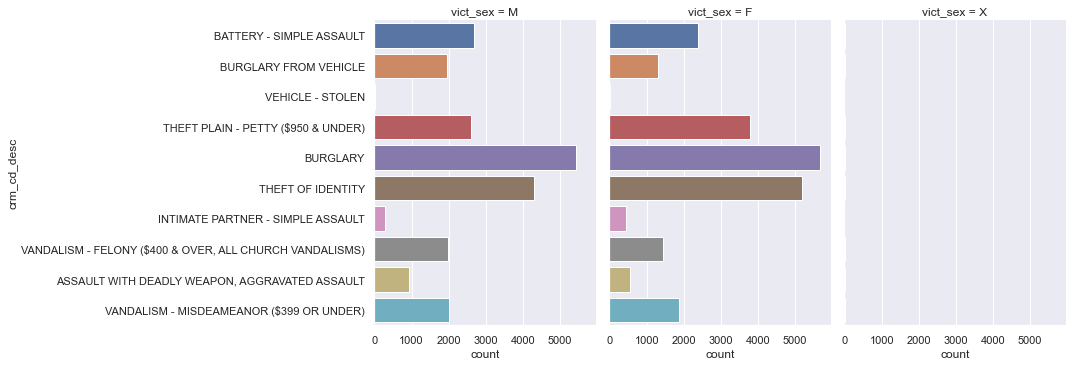

In [797]:
sns.catplot(y = 'crm_cd_desc',kind = 'count',
            data = crime_data[crime_data['vict_age'] >= 70],
            col = 'vict_sex',order = crime_data.crm_cd_desc.value_counts().iloc[:10].index)

#### BURGLARY and THEFT OF IDENTITY are the teo most crime types commited with both the male and female of age 70 or above.

### TIME OF CRIME

In [675]:
most_time = crime_data.groupby('time_occ').count().sort_values('date_occ',ascending = False).head(10)

In [676]:
least_time = crime_data.groupby('time_occ').count().sort_values('date_occ',ascending = False).tail(10)

Text(0.5, 1.0, 'Time of Most Crimes ')

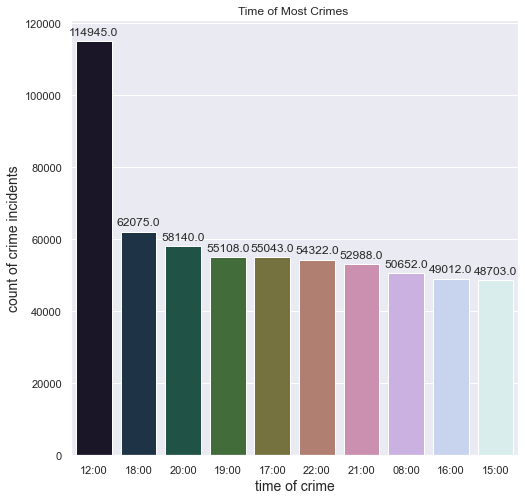

In [679]:
f, ax = plt.subplots(figsize=(8,8))
time = list(most_time.index)
crime_count = list(most_time.date_occ)
splot = sns.barplot(x = time,y = crime_count,data = most_time,palette="cubehelix")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("time of crime", size=14)
plt.ylabel("count of crime incidents", size=14)
plt.savefig("add_text_to_top_of_bars_in_barplot_Seaborn_Python.png")
plt.title("Time of Most Crimes ")

#### It is clearly visible that most crimes occur at midday (12:00).Wonder why criminal do crimes at midday rather than night.

Text(0.5, 1.0, 'Time of least Crimes ')

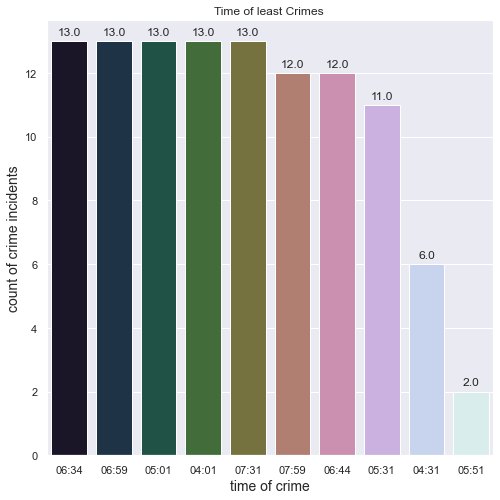

In [680]:
f, ax = plt.subplots(figsize=(8,8))
time = list(least_time.index)
crime_count = list(least_time.date_occ)
splot = sns.barplot(x = time,y = crime_count,data = least_time,palette="cubehelix")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("time of crime", size=14)
plt.ylabel("count of crime incidents", size=14)
plt.savefig("add_text_to_top_of_bars_in_barplot_Seaborn_Python.png")
plt.title("Time of least Crimes ")

#### Least crimes occure at around 4:00 to 8:00.May be because criminals wakeup at this time and getting ready for midday crimes.

### Crime types at 12:00

In [720]:
midday = crime_data[crime_data['time_occ'] == '12:00']

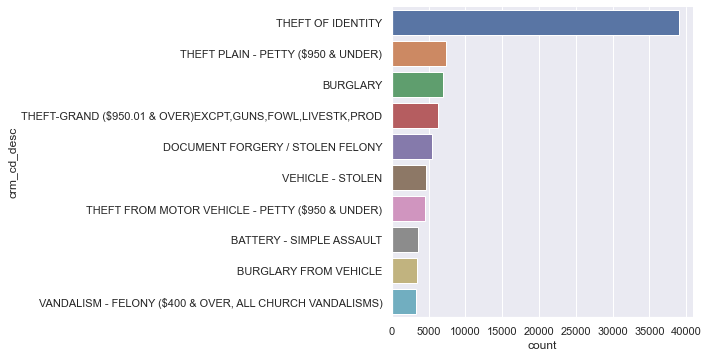

In [728]:
sns.catplot(y = 'crm_cd_desc',kind = 'count',
            data = midday,order = midday.crm_cd_desc.value_counts().iloc[:10].index)

#### THEFT OF IDENTITY is the most common type at 12:00.

### Areas by vict_sex

Text(0.5, 1.0, 'Crimes in LA From 2010-2019')

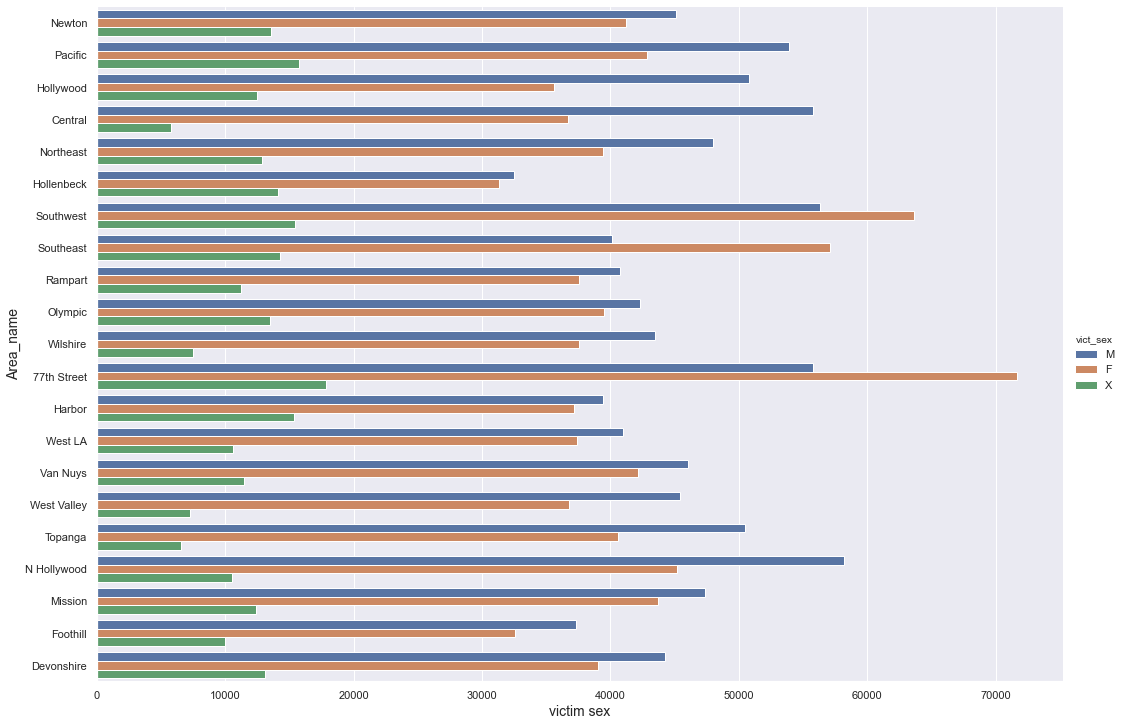

In [686]:
sns.catplot(y = 'area_name',kind = 'count',height=10, aspect=1.5,data = crime_data,hue = 'vict_sex')
plt.xlabel("victim sex", size=14)
plt.ylabel("Area_name", size=14)
plt.savefig("add_text_to_top_of_bars_in_barplot_Seaborn_Python.png")
ax.set_title("Crimes in LA From 2010-2019")
#sns.barplot(y = 'time',x = time.date_occ,data = crime_data,hue = 'vict_sex')

#### It is clearly telling us that the number one crime area in LA has the more Female victims

### CRIMES AT DIFFERENT PREMISES

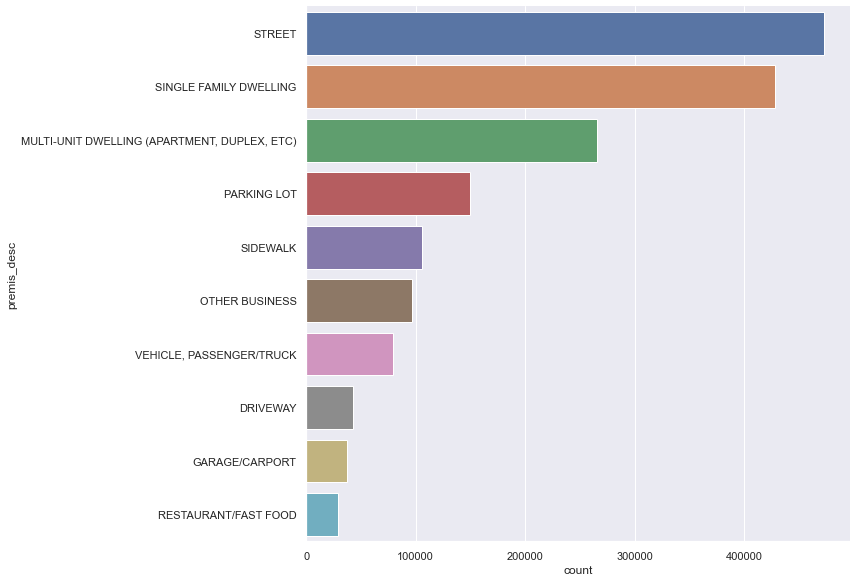

In [815]:
sns.catplot(y = 'premis_desc',kind = 'count',data = crime_data,height=8, aspect=1.5,order = crime_data.premis_desc.value_counts().iloc[:10].index)

#### STREET,SINGLE FAMILY DWELLING,MULTI-UNIT DWELLING,PARKING LOT,SIDE WALK are the top 5 premises for crimes.

### TYPES OF CRIMES AT DIFFERENT PREMISES

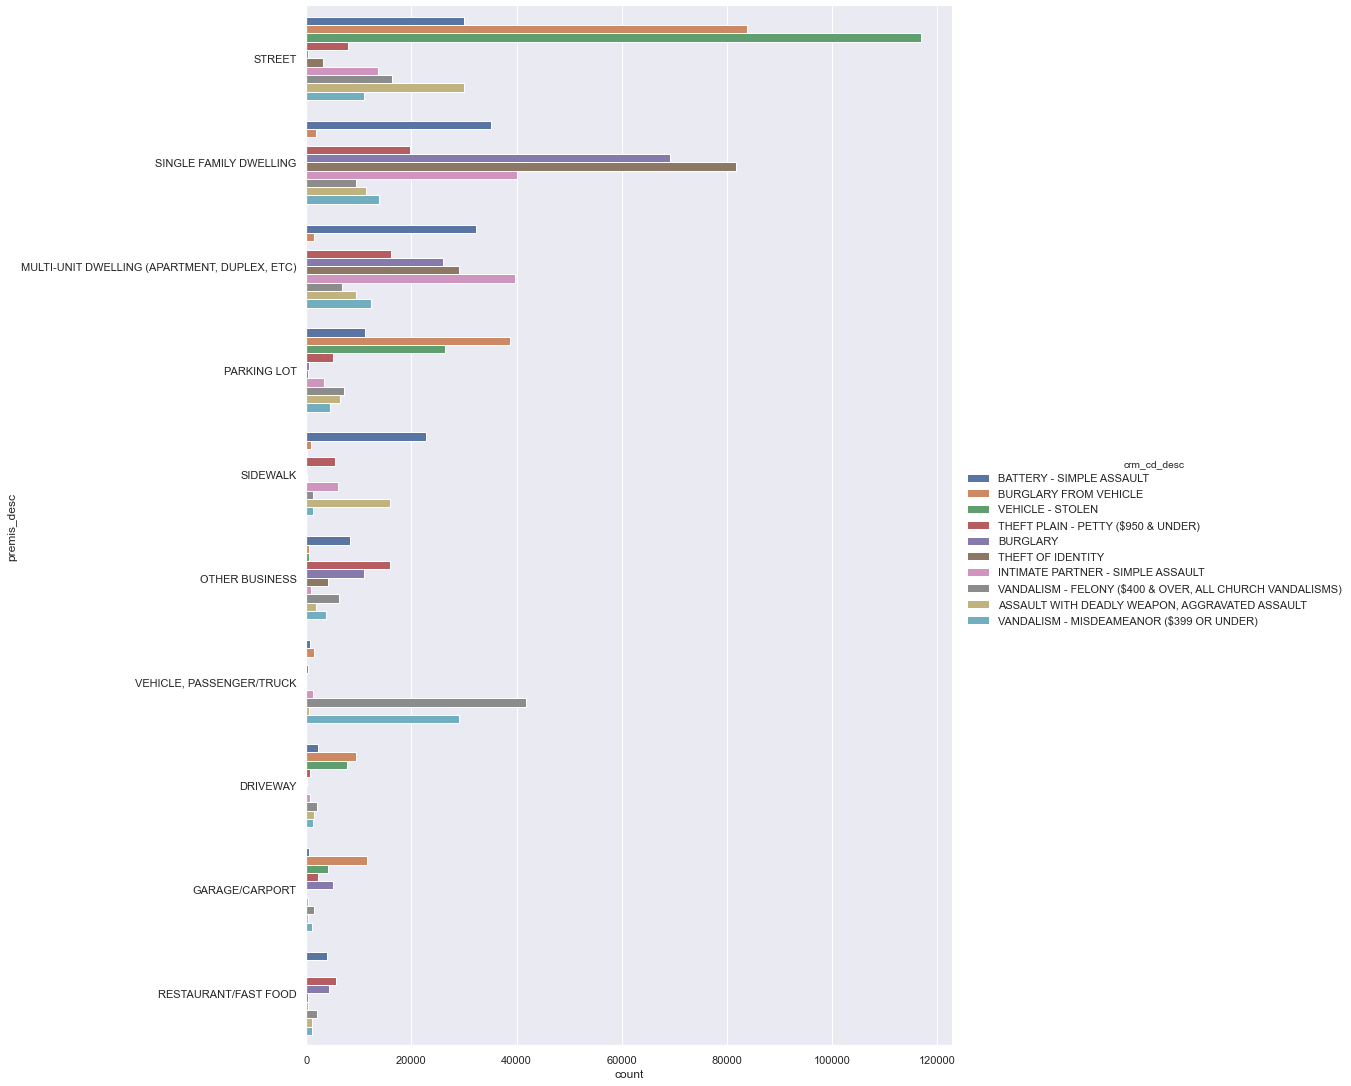

In [838]:
sns.catplot(y = 'premis_desc',kind = 'count',data = crime_data,height=15, 
            aspect=1,hue = 'crm_cd_desc',order = crime_data.premis_desc.value_counts().iloc[:10].index,
            hue_order = crime_data.crm_cd_desc.value_counts().iloc[:10].index)
            

#### Above plot shows very intresting details of types of crimes at different premises.VEHICLE-STOLEN and BURGGLARY FROM VEHICLE are the top crimes at top premis STREET.And we can draw so many conclusions from the above plot.

### VICTIM DESCENT

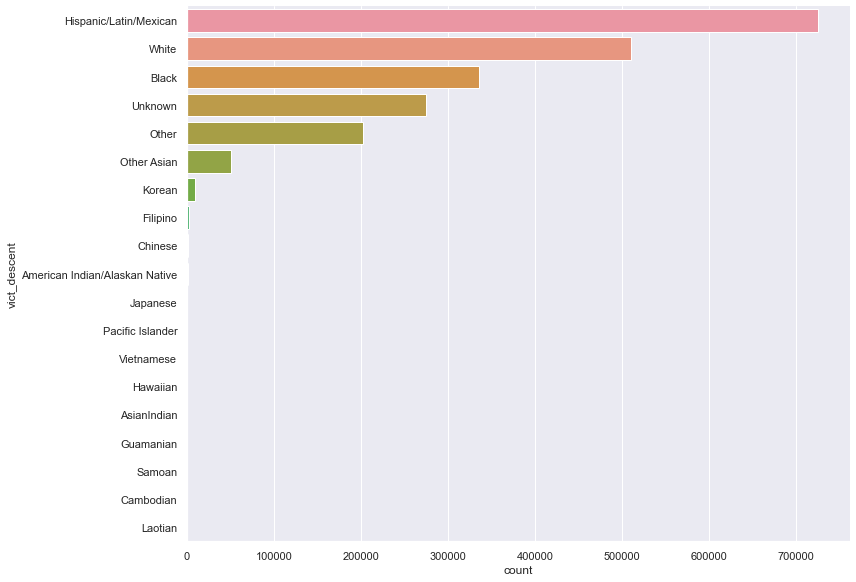

In [840]:
sns.catplot(y = 'vict_descent',data = crime_data,kind = 'count',height=8, aspect=1.5,order=crime_data.vict_descent.value_counts().iloc[:].index)


#### Hispanic/Latin/Mexican, White and Black are the top categories where victims are present.

### VICTIM DESCENT BY SEX

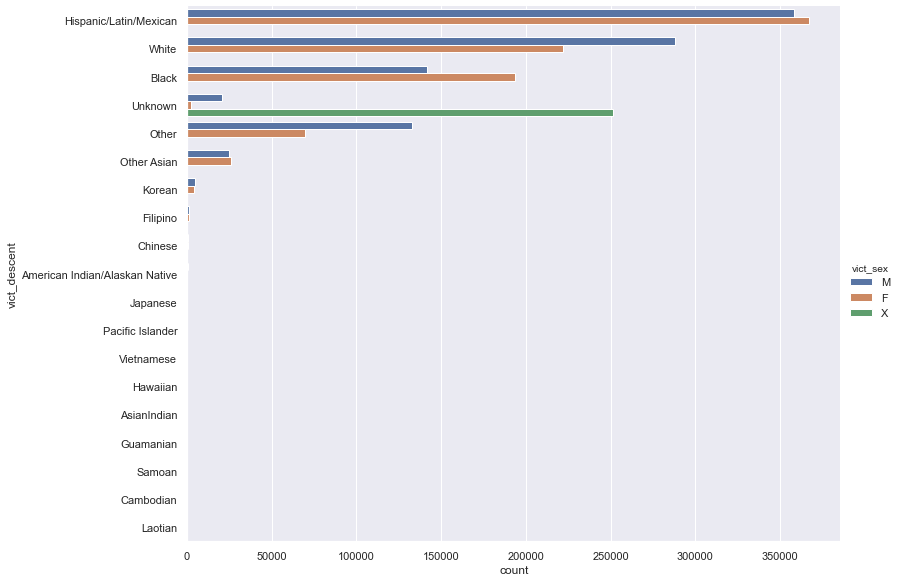

In [842]:
sns.catplot(y = 'vict_descent',data = crime_data,kind = 'count',height=8, aspect=1.5,hue ='vict_sex',order=crime_data.vict_descent.value_counts().iloc[:].index)
            

#### More Female victims are present in the categories of Hispanic/Latin/Mexican and Black.

### VICTIM DESCENT BY AREA

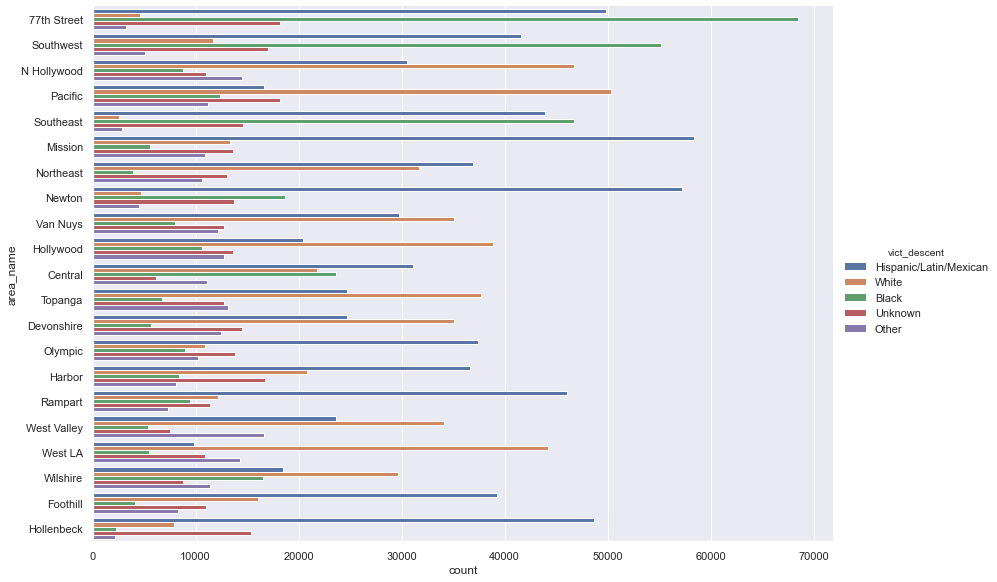

In [844]:
sns.catplot(y = 'area_name',height=8, aspect=1.5,data = crime_data,kind = 'count', hue = 'vict_descent', order = crime_data.area_name.value_counts().iloc[:].index,hue_order = crime_data.vict_descent.value_counts().iloc[:5].index)


#### 77th Street,Southwest has the most victims of category Black.

### WEAPONS IN CRIME

In [851]:
crime_data.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'crm_cd', 'crm_cd_desc', 'mocodes', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'location',
       'lat', 'lon', 'day_crime_occ', 'no_rptd_occ', 'month_name'],
      dtype='object')

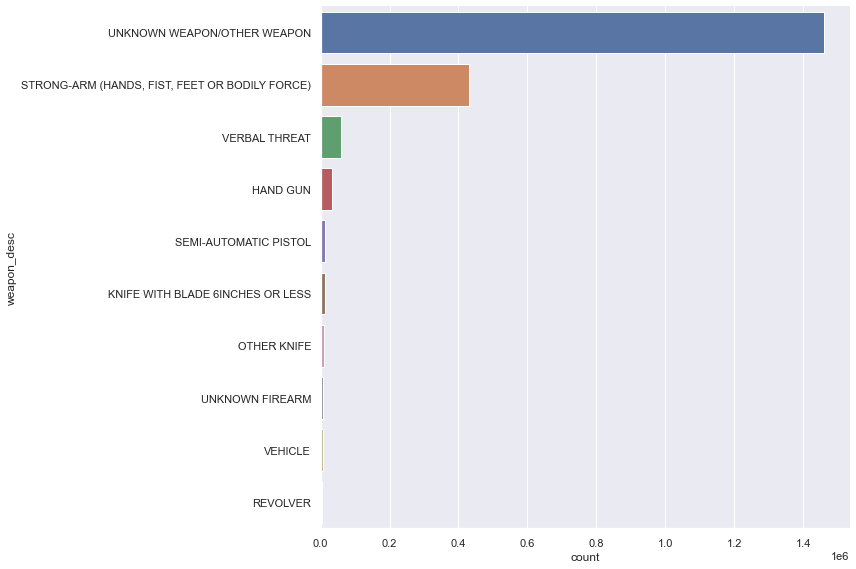

In [853]:
sns.catplot(y = 'weapon_desc',kind = 'count',data = crime_data,height = 8,aspect = 1.5,order = crime_data.weapon_desc.value_counts().iloc[:10].index)

#### It is evident that criminals did not use any weapon/UNKNOWN weapon in most of the crimes.The STRONG-ARM weapon being the second most weapon used in crimes.

### WEAPONS USED IN CRIMES BY AREA

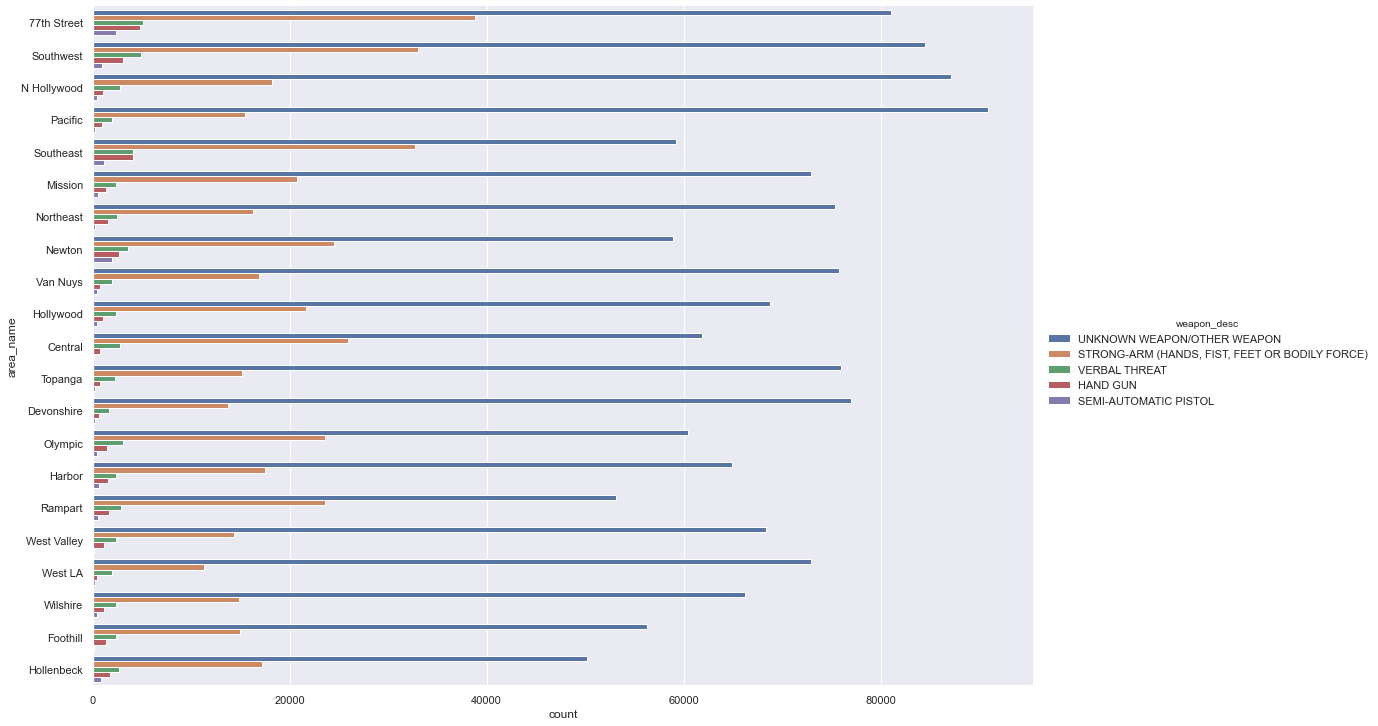

In [859]:
sns.catplot(y = 'area_name',kind = 'count',data = crime_data,height =10,aspect = 1.5,hue = 'weapon_desc',order = crime_data.area_name.value_counts().iloc[:].index,hue_order = crime_data.weapon_desc.value_counts().iloc[:5].index)


#### The above plots tells us that there is no weapon used in most crime in all most all areas of LA.The STRONG-ARM was being the second most weapon used in most crimes in all  the areas.

### REPORTING DISTRICT CRIMES

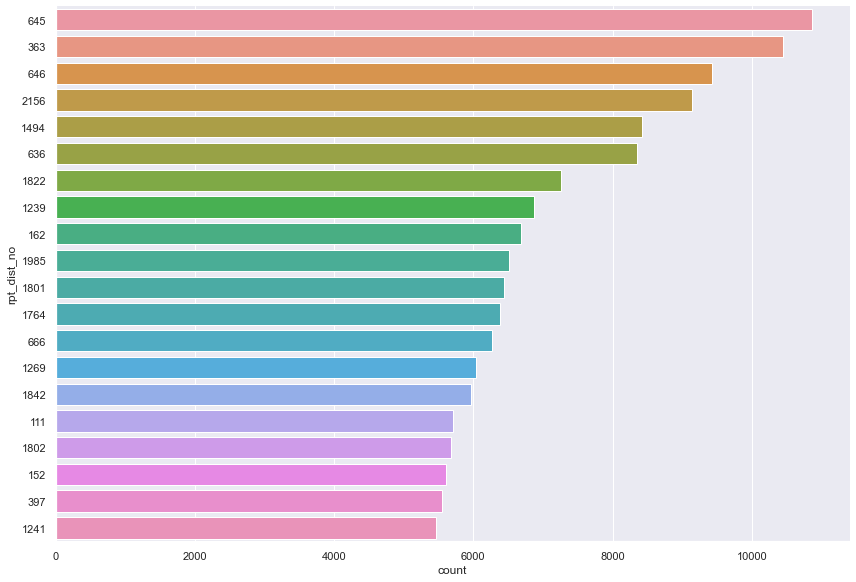

In [865]:
sns.catplot(y = 'rpt_dist_no',kind = 'count',data = crime_data,height = 8,aspect = 1.5,order = crime_data.rpt_dist_no.value_counts().iloc[:20].index)
     

#### The above plot shows the Reporting Districts which reports the maximum number of crimes.

### Map of the Reporting Districts

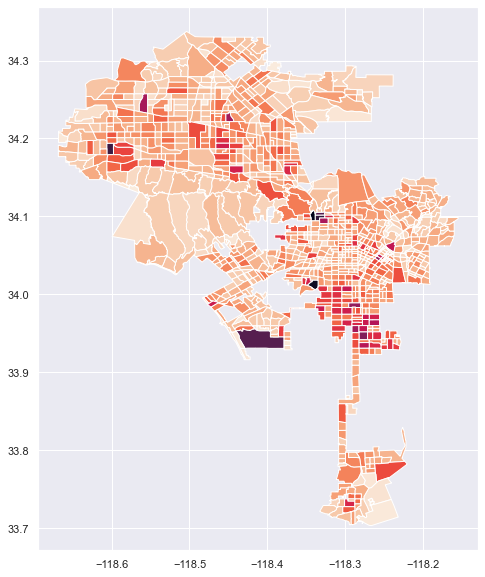

In [979]:
fig ,ax = plt.subplots(figsize = (10,10))
data1 = pd.DataFrame(crime_data.rpt_dist_no.value_counts())
merged1 = df1.set_index('REPDIST').join(data1)
merged1.plot(column = 'rpt_dist_no',cmap = 'rocket_r',ax=ax)

### MAP OF THE NUMBER OF REPORTING DISTRICTS YEAR BY YEAR

In [981]:
def plot_report_density(crimeyear):
    year = pd.to_datetime(crime_data['date_occ']).dt.year
    data = pd.DataFrame(crime_data[year == crimeyear].rpt_dist_no.value_counts())
    #data = pd.DataFrame(crime_data[year == crimeyear].groupby('rpt_dist_no').agg({'lat': 'median','lon':'median'}))
    #data.index = map(lambda x: str(x).upper(), data.index)
    merged = df1.set_index('REPDIST').join(data)
    fig, ax = plt.subplots(figsize = (15,8))

    xlim = ([merged.total_bounds[0],  merged.total_bounds[2]])
    ylim = ([merged.total_bounds[1],  merged.total_bounds[3]])

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    merged.plot(column = 'rpt_dist_no',ax = ax,legend = True,cmap="rocket_r")

    ax.set(title='LOSANGELES')
    ax.set_axis_off()

    plt.show()
    print("The highest 5 reporting dist:", data.head())
    print("The lowest 5 reporting dist:", data.tail())

In [982]:
from ipywidgets import interact,widgets
interact(plot_report_density,crimeyear = widgets.IntSlider(min = 2010,max = 2019,step=1,value=2015))

interactive(children=(IntSlider(value=2015, description='crimeyear', max=2019, min=2010), Output()), _dom_clas…

<function __main__.plot_report_density(crimeyear)>

### REPORTING DISTRICT WITH THEIR TYPE OF CRIMES

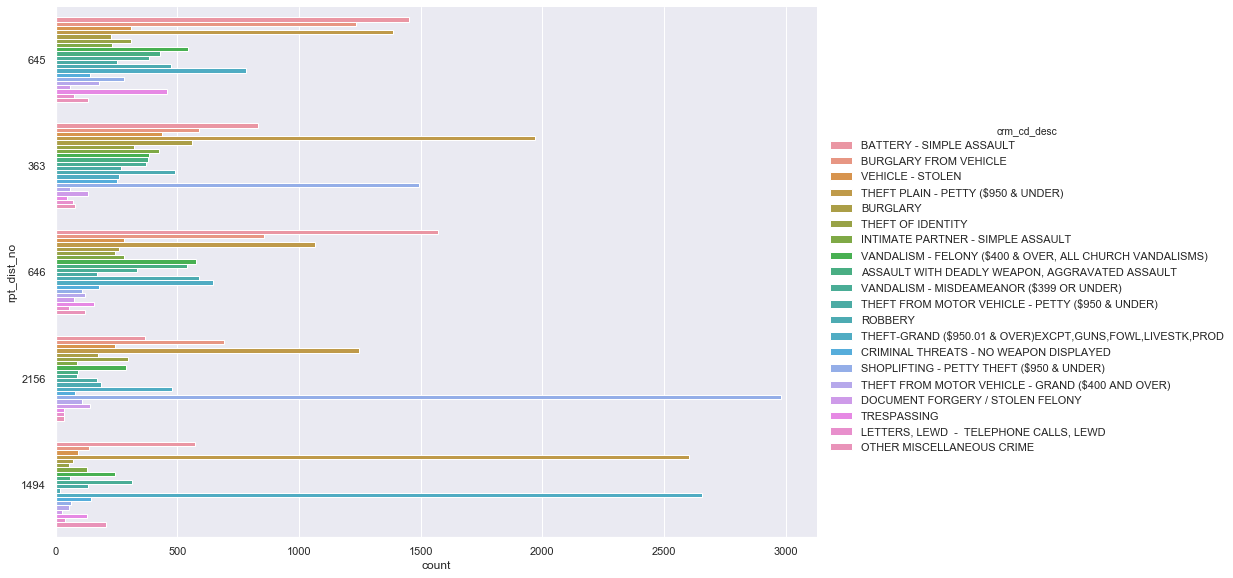

In [8]:
sns.catplot(y = 'rpt_dist_no',kind = 'count',
            data = crime_data,height = 8,aspect = 1.5,
            hue = 'crm_cd_desc',
            hue_order = crime_data.crm_cd_desc.value_counts().iloc[:20].index,
            order = crime_data.rpt_dist_no.value_counts().iloc[:5].index)
     

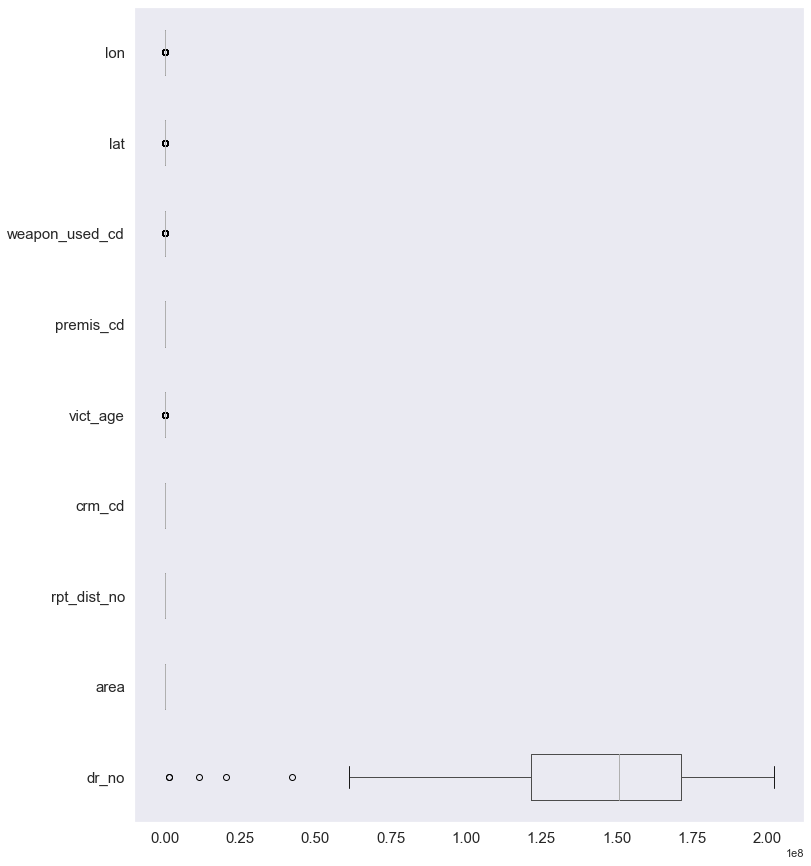

In [1016]:
crime_data.boxplot(grid = False, vert = False,fontsize = 15,figsize = (12,15) )

In [ ]:
sns.catplot(x = 'crm_cd_desc',data =crime_data,kind='box')

In [ ]:
sns.catplot(x='area_name',data=crime_data,kind='box')